In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
file1="c:/temp/svm_data1.csv"
data1=pd.read_csv(file1)
data1

,X1,X2,y
0,-0.486850,-0.621107,1
1,-1.476004,0.132181,1
2,-0.010911,2.037849,1
3,-0.013760,1.164893,1
4,0.515579,1.049514,1
5,-0.139122,0.329392,1
6,1.287317,0.728701,1
7,-0.587773,0.815217,1
8,-0.030600,0.882825,1
9,-2.196844,-0.021392,1


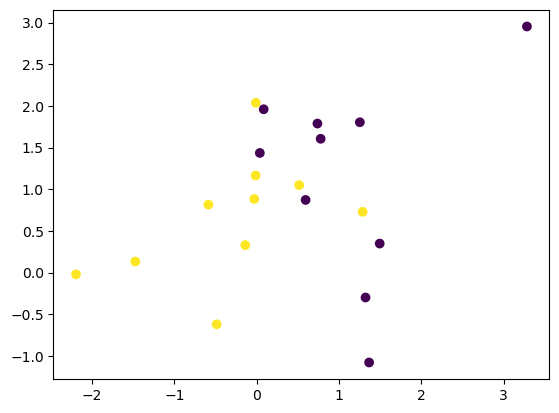

In [3]:
plt.scatter(data1['X1'],data1['X2'],c=data1['y']) 
plt.show()

In [5]:
# svc1, c=0.1->small C->large margin
X=data1[['X1','X2']]
y=data1['y']
svc1=SVC(C=0.1, kernel='linear',random_state=0)
result1=svc1.fit(X,y)
result1

SVC(C=0.1, kernel='linear', random_state=0)

In [6]:
# svc1에 쓰인 서포트 벡터 개수
result1.support_.size

18

In [7]:
#  svc1에 쓰인 서포트 벡터 qjsgh
result1.support_

array([10, 11, 12, 13, 14, 15, 16, 18, 19,  0,  1,  2,  3,  4,  5,  6,  7,
        8])

In [8]:
#  svc1에 쓰인 서포트 벡터의 좌표 값
result1.support_vectors_

array([[ 0.08449906,  1.9599125 ],
       [ 0.77699828,  1.6054105 ],
       [ 1.4945496 ,  0.34788412],
       [ 0.73768926,  1.7883046 ],
       [ 1.3661239 , -1.0792539 ],
       [ 0.03753495,  1.4353855 ],
       [ 1.2532923 ,  1.8039327 ],
       [ 1.3223809 , -0.29942036],
       [ 0.59409535,  0.8716656 ],
       [-0.48685038, -0.62110734],
       [-1.4760038 ,  0.13218145],
       [-0.01091149,  2.0378487 ],
       [-0.01376025,  1.1648929 ],
       [ 0.51557881,  1.0495144 ],
       [-0.13912173,  0.32939234],
       [ 1.2873173 ,  0.72870135],
       [-0.58777297,  0.81521714],
       [-0.03060045,  0.88282478]])

In [9]:
# svc 1 예측성과
pred1=result1.predict(X)
confusion_matrix(y,pred1)

array([[10,  0],
       [ 5,  5]], dtype=int64)

In [10]:
# CCR 1
(10+5)/(10+5+5)

0.75

In [11]:
# svc2, C=1.0 -> large C -> tiny margin
svc2=SVC(C=1.0,kernel='linear',random_state=0)
result2=svc2.fit(X,y)
result2

SVC(kernel='linear', random_state=0)

In [12]:
# svc2 서포트 벡터 개수
result2.support_.size

12

In [13]:
# svc2 서포트 벡터 번호
result2.support_

array([10, 11, 13, 14, 15, 19,  2,  3,  4,  5,  6,  8])

In [14]:
# svc2 서포트 벡터 의 좌표 값
result2.support_vectors_

array([[ 0.08449906,  1.9599125 ],
       [ 0.77699828,  1.6054105 ],
       [ 0.73768926,  1.7883046 ],
       [ 1.3661239 , -1.0792539 ],
       [ 0.03753495,  1.4353855 ],
       [ 0.59409535,  0.8716656 ],
       [-0.01091149,  2.0378487 ],
       [-0.01376025,  1.1648929 ],
       [ 0.51557881,  1.0495144 ],
       [-0.13912173,  0.32939234],
       [ 1.2873173 ,  0.72870135],
       [-0.03060045,  0.88282478]])

In [16]:
# svc3, small C -> large margin, train test split

X=data1[['X1','X2']]
y=data1['y']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)
svc3=SVC(C=0.1, kernel='linear',random_state=0)
result3=svc3.fit(X_train,y_train)
result3

SVC(C=0.1, kernel='linear', random_state=0)

In [17]:
# svc3 서포트 벡터 번호
result3.support_

array([ 1,  5,  8,  9, 12, 13,  0,  2,  3,  4,  7, 10, 11])

In [18]:
# svc3 서포트 벡터 개수
result3.support_.size

13

In [19]:
# svc3 서포트 벡터 좌표값
result3.support_vectors_

array([[ 0.73768926,  1.7883046 ],
       [ 1.3661239 , -1.0792539 ],
       [ 1.2532923 ,  1.8039327 ],
       [ 0.77699828,  1.6054105 ],
       [ 0.03753495,  1.4353855 ],
       [ 1.4945496 ,  0.34788412],
       [ 1.2873173 ,  0.72870135],
       [ 0.51557881,  1.0495144 ],
       [-0.01091149,  2.0378487 ],
       [-0.13912173,  0.32939234],
       [-0.58777297,  0.81521714],
       [-0.01376025,  1.1648929 ],
       [-0.48685038, -0.62110734]])

In [20]:
# svc3 예측 성과
pred3=result3.predict(X_test)
confusion_matrix(y_test,pred3)

array([[1, 3],
       [0, 2]], dtype=int64)

In [21]:
file2="c:/temp/svm_data1.csv"
data2=pd.read_csv(file2)
data2

,X1,X2,y
0,-0.486850,-0.621107,1
1,-1.476004,0.132181,1
2,-0.010911,2.037849,1
3,-0.013760,1.164893,1
4,0.515579,1.049514,1
5,-0.139122,0.329392,1
6,1.287317,0.728701,1
7,-0.587773,0.815217,1
8,-0.030600,0.882825,1
9,-2.196844,-0.021392,1


In [23]:
# svc4, kernel function, small C -> large margin
X=data2[['X1','X2']]
y=data2['y']
svc4=SVC(C=0.1,kernel='rbf',gamma='scale',random_state=0)
result4=svc4.fit(X,y)
result4

SVC(C=0.1, random_state=0)

In [24]:
# svc 4 예측 성과
pred4=result4.predict(X)
confusion_matrix(y,pred4)

array([[10,  0],
       [ 3,  7]], dtype=int64)

In [25]:
# svc5, kernel function, small C -> large margin
X=data2[['X1','X2']]
y=data2['y']
svc5=SVC(C=0.1,kernel='poly',degree=3,random_state=0)
result5=svc5.fit(X,y)
result5

SVC(C=0.1, kernel='poly', random_state=0)

In [26]:
pred5=result5.predict(X)
confusion_matrix(y,pred5)

array([[5, 5],
       [1, 9]], dtype=int64)